In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('Solar_Prediction.csv')
# Define features and target
X = df[['Temperature', 'Pressure', 'Humidity','WindDirection(Degrees)', 'Speed']]
y = df['Radiation']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize and fit the model
gb_model = GradientBoostingRegressor(learning_rate= 0.2, n_estimators=  200, max_depth= 5,min_samples_split=5,min_samples_leaf=2, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate model performance
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_mape = mean_absolute_percentage_error(y_test, gb_predictions)



print(f"Gradient Boosting - MAE: {gb_mae}, MSE: {gb_mse}, R^2: {gb_r2}, RMSE: {gb_rmse}, MAPE: {gb_mape}")


Gradient Boosting - MAE: 97.69037784689849, MSE: 27234.131569248697, R^2: 0.7244191039447067, RMSE: 165.02766910202877, MAPE: 16.689171693110648


In [3]:
import xgboost as xgb

# Initialize and fit the model
xgb_model = xgb.XGBRegressor(learning_rate=0.2, n_estimators=200, max_depth=5, colsample_bytree = 1, subsample = 1,  random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate model performance
gb_mae = mean_absolute_error(y_test, xgb_predictions)
gb_mse = mean_squared_error(y_test, xgb_predictions)
gb_r2 = r2_score(y_test, xgb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)



print(f"Gradient Boosting - MAE: {gb_mae}, MSE: {gb_mse}, R^2: {gb_r2}, RMSE: {gb_rmse}, MAPE: {gb_mape}")



Gradient Boosting - MAE: 96.19041846089038, MSE: 26030.69569641255, R^2: 0.7365966149234575, RMSE: 161.34031020303806, MAPE: 16.69868696884806


In [4]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv('Solar_Prediction.csv')

# Features and target
X = df.drop('Radiation', axis=1)
y = df['Radiation']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Measure performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.2f}")

# Save model
joblib.dump(rf_model, 'random_forest_model.pkl')


Random Forest MAE: 88.59
Random Forest MSE: 24643.14
Random Forest R²: 0.75


['random_forest_model.pkl']

In [5]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv('Solar_Prediction.csv')

# Features and target
X = df.drop('Radiation', axis=1)
y = df['Radiation']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Measure performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MAE: {mae:.2f}")
print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R²: {r2:.2f}")

# Save model
joblib.dump(lr_model, 'linear_regression_model.pkl')


Linear Regression MAE: 159.43
Linear Regression MSE: 43432.92
Linear Regression R²: 0.56


['linear_regression_model.pkl']

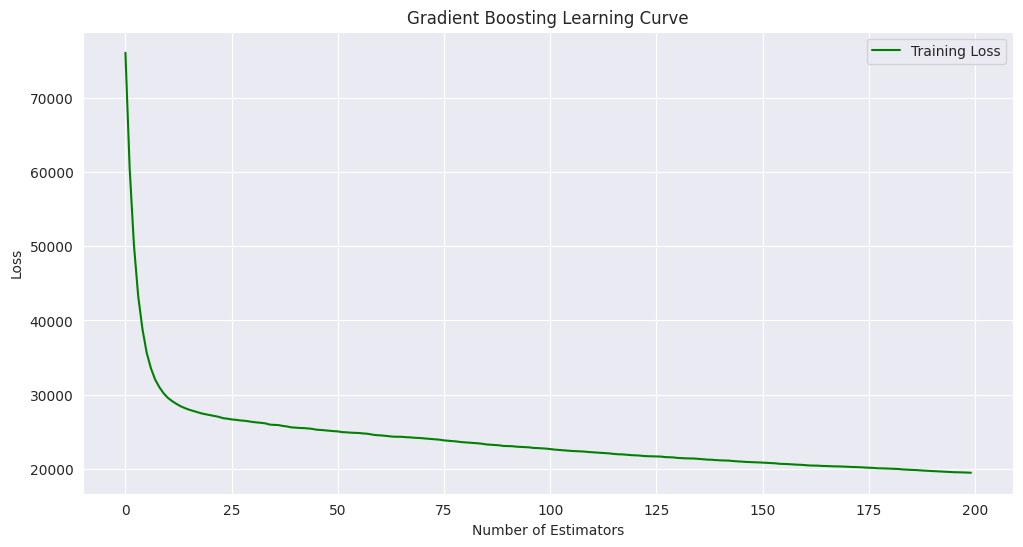

In [6]:
# Plotting Learning Curve
plt.figure(figsize=(12, 6))
plt.plot(gb_model.train_score_, label='Training Loss', color='green')
plt.title('Gradient Boosting Learning Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
#Regularization

from sklearn.linear_model import Lasso, Ridge

# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)

# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)

# Evaluate Lasso and Ridge
lasso_mse = mean_squared_error(y_test, lasso_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

print(f"Lasso MSE: {lasso_mse}")
print(f"Ridge MSE: {ridge_mse}")


Lasso MSE: 43426.541224048735
Ridge MSE: 43430.33813089383


In [8]:
import joblib

# Save the best model
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [9]:
# cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated MSE: {-scores.mean()}')


Cross-Validated MSE: 42223.021014262646


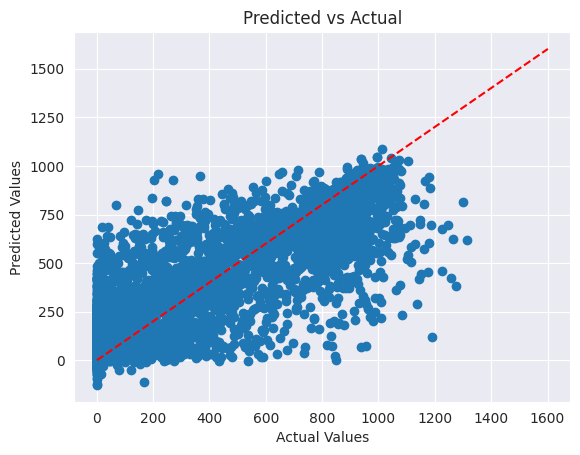

In [10]:
plt.scatter(y_test, xgb_predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.show()
